# LEGO Data Analysis - Rebrickable

The dataset is from https://rebrickable.com/downloads/. 

From the Rebrickable website - "The LEGO Parts/Sets/Colors and Inventories of every official LEGO set in the Rebrickable database is available for download as csv files here. These files are automatically updated daily. If you need more details, you can use the API which provides real-time data, but has rate limits that prevent bulk downloading of data."

Rebrickable provides this database to be used for any purpose.

## LEGO Data Model

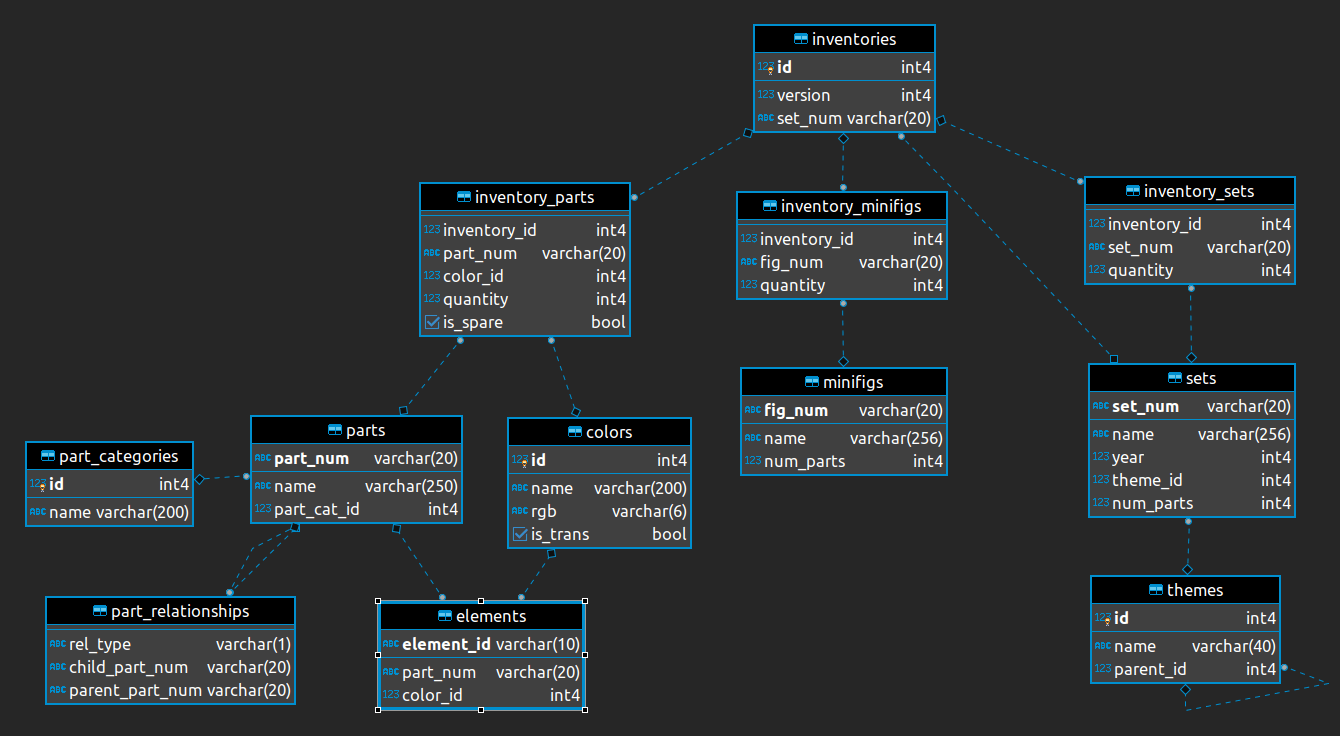

#### Importing Libraries

In [38]:
import pandas as pd
import numpy as np

#### Getting Data

In [39]:
lego_sets = pd.read_csv('data/sets.csv').dropna(subset=["set_num"])
themes = pd.read_csv('data/themes.csv')

#### Display Top 10 Rows of the sets dataset

In [40]:
lego_sets.head(10)

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
5,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg
6,0014-1,Space Mini-Figures,1982,143,2,https://cdn.rebrickable.com/media/sets/0014-1.jpg
7,0015-1,Space Mini-Figures,1979,143,18,https://cdn.rebrickable.com/media/sets/0015-1.jpg
8,0016-1,Castle Mini Figures,1979,189,15,https://cdn.rebrickable.com/media/sets/0016-1.jpg
9,002-1,4.5V Samsonite Gears Motor Set,1965,756,3,https://cdn.rebrickable.com/media/sets/002-1.jpg


#### Display Last 10 Rows of the sets dataset

In [41]:
lego_sets.tail(10)

,set_num,name,year,theme_id,num_parts,img_url
26005,XBOXGAME-3,DC Super-Villains - Xbox One,2018,742,0,https://cdn.rebrickable.com/media/sets/xboxgam...
26006,XBOXGAME-9,Star Wars: The Video Game - Xbox,2005,742,0,https://cdn.rebrickable.com/media/sets/xboxgam...
26007,XMASTREE-1,Christmas Tree,2019,410,26,https://cdn.rebrickable.com/media/sets/xmastre...
26008,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
26009,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...
26010,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...
26011,YOTO-1,"1, 2, 3 Play with Me YOTO Cards",2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-1.jpg
26012,YOTO-2,A is for Alphabet,2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-2.jpg
26013,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...
26014,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0,https://cdn.rebrickable.com/media/sets/zx8000-...


#### Check Datatype of Each Column

In [42]:
lego_sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
img_url      object
dtype: object

#### Check NULL Values in Sets

In [43]:
lego_sets.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
img_url      0
dtype: int64

#### How many Rows and Columns are there in our dataset

In [44]:
lego_sets.shape

(26015, 6)

In [45]:
len(lego_sets.columns)

6

In [46]:
len(lego_sets)

26015

In [47]:
lego_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26015 entries, 0 to 26014
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    26015 non-null  object
 1   name       26015 non-null  object
 2   year       26015 non-null  int64 
 3   theme_id   26015 non-null  int64 
 4   num_parts  26015 non-null  int64 
 5   img_url    26015 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


## MERGE DATA
#### Joining the two datasets to answer questions

In [48]:
lego_sets_themes = lego_sets.merge(
    themes[["id", "name"]],
    left_on="theme_id", right_on="id", how="left", suffixes=("_sets", "_themes"))

In [49]:
lego_sets_themes.head()

,set_num,name_sets,year,theme_id,num_parts,img_url,id,name_themes
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...,761,Activity Books with LEGO Parts
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,756,Samsonite
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg,67,Classic Town
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg,199,Lion Knights
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg,143,Supplemental


In [50]:
lego_sets_themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26015 entries, 0 to 26014
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   set_num      26015 non-null  object
 1   name_sets    26015 non-null  object
 2   year         26015 non-null  int64 
 3   theme_id     26015 non-null  int64 
 4   num_parts    26015 non-null  int64 
 5   img_url      26015 non-null  object
 6   id           26015 non-null  int64 
 7   name_themes  26015 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.6+ MB


### Now Let's Answer some Questions

#### 1.) What is the total number of parts per theme?

In [51]:
lego_set_part_per_theme = lego_sets_themes.groupby('name_themes')['num_parts'].sum()

#### 2.) What is the total number of parts per year?

In [52]:
lego_set_part_per_year = lego_sets_themes.groupby('year')['num_parts'].sum()

#### 3.) How many sets where created in each Century in the dataset?

In [53]:
unique_year = lego_sets_themes['year'].unique()
unique_year.sort()
unique_year

array([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026])

In [54]:
import sys

bins = [1800, 1900, 2000, 2100]
labels = ['19th Century', '20th Century', '21st Century']
lego_sets_themes['century'] = pd.cut(lego_sets_themes['year'], bins=bins, labels=labels, right=False)
lego_sets_themes


,set_num,name_sets,year,theme_id,num_parts,img_url,id,name_themes,century
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...,761,Activity Books with LEGO Parts,21st Century
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,756,Samsonite,20th Century
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg,67,Classic Town,20th Century
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg,199,Lion Knights,20th Century
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg,143,Supplemental,20th Century
...,...,...,...,...,...,...,...,...,...
26010,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...,158,Star Wars,21st Century
26011,YOTO-1,"1, 2, 3 Play with Me YOTO Cards",2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-1.jpg,501,Gear,21st Century
26012,YOTO-2,A is for Alphabet,2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-2.jpg,501,Gear,21st Century
26013,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...,598,Promotional,21st Century


#### 4.) What percentage of sets ever released in the 21st Century were Trains Themed?

In [55]:
Century_data = lego_sets_themes[lego_sets_themes['century'] == '21st Century'] #filters for 21st century data.
Trains_21stCentury = Century_data[Century_data['name_themes']=='Trains']#from the filtered century data find how many are train themed.

In [56]:
Century_data.shape[0]

21305

In [57]:
Trains_21stCentury.shape[0]

77

In [58]:
Trains_21stCentury.shape[0] / Century_data.shape[0] * 100

0.3614175076273175

#### 5.) What percentage of sets ever released in the 21st Century were Disney Themed?

In [59]:
Century_data = lego_sets_themes[lego_sets_themes['century'] == '21st Century']
Disney_21stCentury = Century_data[Century_data['name_themes']=='Disney']

In [60]:
Century_data.shape[0]

21305

In [61]:
Disney_21stCentury.shape[0]

69

In [62]:
Disney_21stCentury.shape[0] / Century_data.shape[0] * 100

0.32386763670499885

#### 6.) What is the most popular theme by year in terms of sets released in the 21st Century?

In [63]:
Pop_theme_per_year = Century_data.groupby(['year', 'name_themes']).count().reset_index()
Pop_theme_per_year = Pop_theme_per_year[['year', 'name_themes','set_num']].sort_values('set_num', ascending=False)
Pop_theme_per_year.drop_duplicates('year').sort_values('year', ascending=False)

,year,name_themes,set_num
2179,2026,City,25
2153,2025,Stationery and Office Supplies,68
1974,2024,"Bags, Totes, & Luggage",81
1875,2023,"Bags, Totes, & Luggage",59
1782,2022,"Bags, Totes, & Luggage",128
1717,2021,Gear,102
1591,2020,"Bags, Totes, & Luggage",68
1575,2019,The LEGO Movie II,64
1472,2018,Star Wars,69
1310,2017,"Bags, Totes, & Luggage",66


#### 7.) What is the most produced color of lego ever in terms of quantity of parts?

In [33]:
colors = pd.read_csv('data/colors.csv')
colors

,id,name,rgb,is_trans,num_parts,num_sets,y1,y2
0,-1,[Unknown],0033B2,False,17,2,2000.0,2000.0
1,0,Black,05131D,False,793829,220054,1957.0,2026.0
2,1,Blue,0055BF,False,199985,48485,1949.0,2026.0
3,2,Green,237841,False,86199,25612,1949.0,2026.0
4,3,Dark Turquoise,008F9B,False,21957,5782,1998.0,2026.0
...,...,...,...,...,...,...,...,...
270,1144,Chrome Red,CE3021,False,4,4,2003.0,2009.0
271,1145,Ochre Yellow,DD9E47,False,10,10,2025.0,2026.0
272,1146,Warm Pink,F6B7BF,False,256,24,2026.0,2026.0
273,1147,Blue Violet,A3A9FF,False,64,13,2026.0,2026.0


In [34]:
inventory_parts = pd.read_csv('data/inventory_parts.csv')
inventory_parts

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c04,72,1,False,https://cdn.rebrickable.com/media/parts/photos...
1,1,48391,0,1,False,https://cdn.rebrickable.com/media/parts/photos...
2,1,48395,7,1,False,https://cdn.rebrickable.com/media/parts/photos...
3,1,48864c01,25,1,False,NaN
4,1,stickerupn0077,9999,1,False,NaN
...,...,...,...,...,...,...
1460933,315119,4083,1,1,False,https://cdn.rebrickable.com/media/parts/elemen...
1460934,315119,4315,1,1,False,https://cdn.rebrickable.com/media/parts/ldraw/...
1460935,315119,4349,0,2,False,https://cdn.rebrickable.com/media/parts/elemen...
1460936,315119,4589,42,1,False,https://cdn.rebrickable.com/media/parts/elemen...


In [35]:
parts = pd.read_csv('data/parts.csv')
parts

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic
...,...,...,...,...
60787,upn0519,"Clikits Padlock, Combination",48,Plastic
60788,upn0520,Clikits Bag with Bright Pink Heart Pocket and ...,48,Cloth
60789,upn0521,"Clikits Paper, 'Heart' and Pink Heart Border P...",48,Cardboard/Paper
60790,upn0522,"Clikits Envelope, White and Pink with Circles ...",48,Cardboard/Paper


In [36]:
#merge tables
parts_with_inventory = parts.merge(inventory_parts[['part_num','color_id','quantity']], left_on="part_num", right_on="part_num", how="left")
parts_with_inventory

,part_num,name,part_cat_id,part_material,color_id,quantity
0,003381,Sticker Sheet for Set 663-1,58,Plastic,9999.0,1.0
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic,9999.0,1.0
2,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic,9999.0,1.0
3,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic,9999.0,1.0
4,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic,9999.0,1.0
...,...,...,...,...,...,...
1462492,upn0519,"Clikits Padlock, Combination",48,Plastic,45.0,1.0
1462493,upn0520,Clikits Bag with Bright Pink Heart Pocket and ...,48,Cloth,5.0,1.0
1462494,upn0521,"Clikits Paper, 'Heart' and Pink Heart Border P...",48,Cardboard/Paper,9999.0,10.0
1462495,upn0522,"Clikits Envelope, White and Pink with Circles ...",48,Cardboard/Paper,9999.0,10.0


In [37]:
colors_and_parts = parts_with_inventory.merge(
    colors[["id", "name"]],
    left_on="color_id", right_on="id", how="left", suffixes=("_theme", "_colors"))
colors_and_parts

,part_num,name_theme,part_cat_id,part_material,color_id,quantity,id,name_colors
0,003381,Sticker Sheet for Set 663-1,58,Plastic,9999.0,1.0,9999.0,[No Color/Any Color]
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic,9999.0,1.0,9999.0,[No Color/Any Color]
2,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic,9999.0,1.0,9999.0,[No Color/Any Color]
3,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic,9999.0,1.0,9999.0,[No Color/Any Color]
4,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic,9999.0,1.0,9999.0,[No Color/Any Color]
...,...,...,...,...,...,...,...,...
1462492,upn0519,"Clikits Padlock, Combination",48,Plastic,45.0,1.0,45.0,Trans-Dark Pink
1462493,upn0520,Clikits Bag with Bright Pink Heart Pocket and ...,48,Cloth,5.0,1.0,5.0,Dark Pink
1462494,upn0521,"Clikits Paper, 'Heart' and Pink Heart Border P...",48,Cardboard/Paper,9999.0,10.0,9999.0,[No Color/Any Color]
1462495,upn0522,"Clikits Envelope, White and Pink with Circles ...",48,Cardboard/Paper,9999.0,10.0,9999.0,[No Color/Any Color]


In [32]:
Pop_color = colors_and_parts.groupby('name_colors').sum().reset_index()
Pop_color = Pop_color[['name_colors', 'quantity']].sort_values('quantity', ascending=False)
Pop_color

,name_colors,quantity
1,Black,900909.0
102,Light Bluish Gray,563786.0
258,White,539270.0
27,Dark Bluish Gray,402066.0
196,Red,339335.0
...,...,...
82,HO Light Aqua,1.0
86,HO Light Yellow,1.0
91,HO Metallic Green,1.0
92,HO Metallic Sand Blue,1.0


#### 8.) What percentage of all licensed sets ever released were Star Wars themed?

In [65]:
lego_sets = pd.read_csv('data/sets.csv').dropna(subset=["set_num"])
themes = pd.read_csv('data/themes.csv')
merged_table = lego_sets.merge(
    themes[["id", "name"]],
    left_on="theme_id", right_on="id", how="left"
)
a = merged_table[["set_num", "name_x", "year", "name_y"]]
a.columns = ["set_num", "set_name", "year", "theme_name"]
c = a[a["theme_name"] == 'Star Wars']
the_force = int((c["theme_name"].count() / len(a)) * 100)
print(the_force)


3


#### 9.) In which year was the highest number of Star Wars sets released?

In [66]:
d = c.groupby("year")["set_num"].count()

new_era = d.idxmax()
print(new_era)

2015
